# IEOR 165 Project

*Project By: Yewon Park, Kunhee Kim, Kellen Rice, Aashritha Srirambhatla, Rudy Lee*

The authors of the following research paper:
Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis, “Modeling wine preferences by data mining
from physicochemical properties”, Decision Support Systems, vol. 47, no. 4:547-553, 2009.
considered the problem of modeling wine preferences. Wine can be evaluated by experts who
give a subjective score, and the question the authors of this paper considered was how to build
a model that relates objective features of the wine (e.g., pH values) to its rated quality.

In [ ]:
#Importing Packages
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import itertools
from ipywidgets import interact, interactive
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
#Read in the Red Wine Quality CSV file
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [ ]:
#Original Dataframe
df_org = pd.read_csv("winequality-red.csv")
df_org.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Setting the variables before constructing our model
X_np = df_org.iloc[:, :-1].to_numpy()
Y_np = df_org.iloc[:, -1].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(df_org.iloc[:, :-1], df_org.iloc[:, -1], test_size = 0.15)

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# **1) Ordinary Least Squares**

In [ ]:
def create_X(name):
    X = df_org.loc[:,name]  # predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    return X
var = []
for i in columns:
    est = sm.OLS(df_org.quality, create_X(i))
    est = est.fit()
    print(est.summary())
    var.append([est.params[0],est.params[1]])
df = pd.DataFrame(var, columns=['constants', 'intercept'], index=columns)
df

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sat, 07 May 2022   Prob (F-statistic):           6.50e-07
Time:                        03:01:47   Log-Likelihood:                -1914.2
No. Observations:                1599   AIC:                             3832.
Df Residuals:                    1597   BIC:                             3843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1573      0.098     52.684

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,constants,intercept
fixed acidity,5.157322,0.057539
volatile acidity,6.565746,-1.761438
citric acid,5.381725,0.938452
residual sugar,5.616055,0.007865
chlorides,5.829485,-2.211842
free sulfur dioxide,5.698107,-0.003911
total sulfur dioxide,5.847179,-0.004544
density,80.238538,-74.846014
pH,6.635923,-0.301983
sulphates,4.847750,1.197712


In [ ]:
est = sm.OLS(df_org.quality, create_X('alcohol'))
est = est.fit()
est.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



const      1.874975
alcohol    0.360842
dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


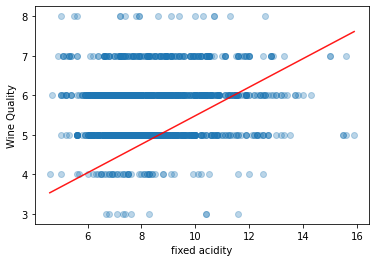

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


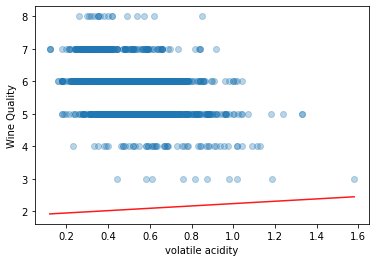

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


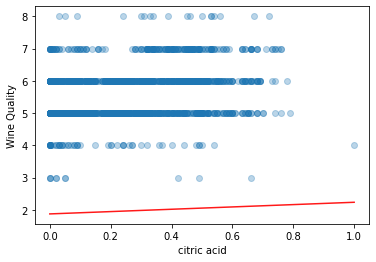

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


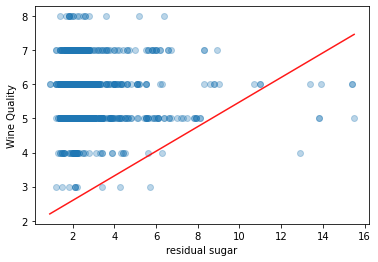

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


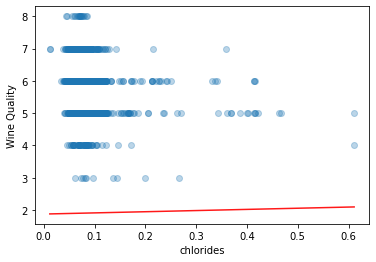

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


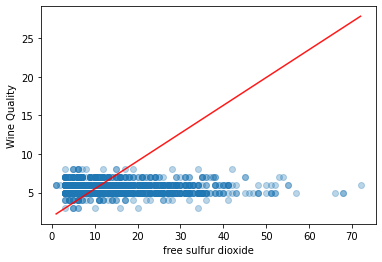

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


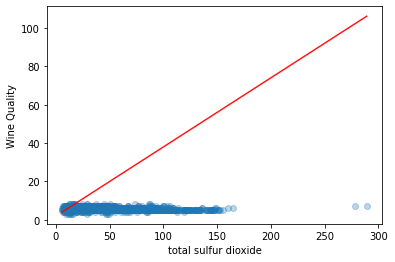

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


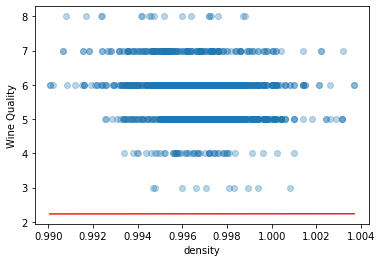

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


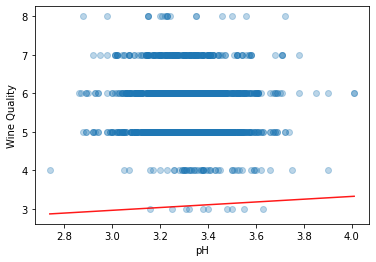

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


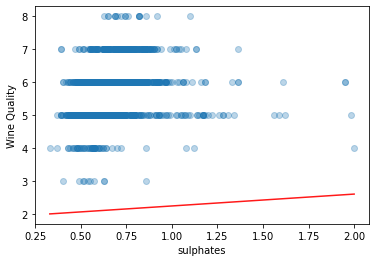

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


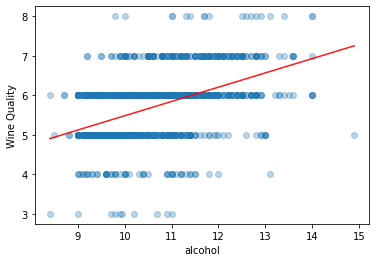

In [ ]:
X_prime_all = []
y_hat_all = []
for i in columns:
    # Make sure that graphics appear inline in the iPython notebook 
    get_ipython().run_line_magic('matplotlib', 'inline')
    # We pick 100 hundred points equally spaced from the min to the max 
    X_prime = np.linspace(create_X(i).iloc[:,1].min(), create_X(i).iloc[:,1].max(), 100)[:, np.newaxis] 
    X_prime = sm.add_constant(X_prime) 
    # add constant as we did before 
    # Now we calculate the predicted values 
    y_hat = est.predict(X_prime) 
    X_prime_all.append(X_prime)
    y_hat_all.append(y_hat)

for i in range(len(X_prime_all)):
    plt.scatter(create_X(columns[i]).iloc[:,1], df_org.quality, alpha=0.3) 
    # Plot the raw data 
    plt.xlabel(columns[i]) 
    plt.ylabel("Wine Quality") 
    plt.plot(X_prime_all[i][:, 1], y_hat_all[i], 'r', alpha=0.9)
    plt.show() 

In [ ]:
for i in columns:
    dep_ind = 'quality ~ Q("' + i + '")'
    est = smf.ols(formula=dep_ind, data=df_org).fit() 
    print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sat, 07 May 2022   Prob (F-statistic):           6.50e-07
Time:                        02:24:12   Log-Likelihood:                -1914.2
No. Observations:                1599   AIC:                             3832.
Df Residuals:                    1597   BIC:                             3843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1573      0

## **2) Ridge Regression**

### Start alpha value = 0.5

In [ ]:
train, test = train_test_split(df_org, test_size=0.15, random_state=83)
models = {}

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for i in range(len(columns)):
    # The features to include in the ith model
    features = columns[:(i+1)]
    # The name we are giving to the ith model
    name = ",".join([name[0] for name in features])
    # The pipeline for the ith model
    model = Pipeline([
        ("SelectColumns", ColumnTransformer([
            ("keep", "passthrough", features),
        ])),
        ("Imputation", SimpleImputer()),
        ("LinearModel",  Ridge(alpha=0.5))
    ])
    # Fit the pipeline
    model.fit(train, train['quality']);
    # Saving the ith model
    models[name] = model

In [ ]:
models.keys()

dict_keys(['f', 'f,v', 'f,v,c', 'f,v,c,r', 'f,v,c,r,c', 'f,v,c,r,c,f', 'f,v,c,r,c,f,t', 'f,v,c,r,c,f,t,d', 'f,v,c,r,c,f,t,d,p', 'f,v,c,r,c,f,t,d,p,s', 'f,v,c,r,c,f,t,d,p,s,a'])

### Cross Val Score

In [ ]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))

In [ ]:
cross_val_score(models['f'], train, train['quality'], scoring=rmse_score, cv=5)

array([0.86841077, 0.77461307, 0.78514245, 0.76545821, 0.86164571])

In [ ]:
np.mean(cross_val_score(models['f'], train, train['quality'], scoring=rmse_score, cv=5))

0.8110540416119708

### Cross Validation RMSE of Corresponding Parameters with alpha = 0.5

In [ ]:
def compare_models(models):
    # Compute the cross validation error for each model
    validation_rmse = [np.mean(cross_val_score(model, train, train['quality'], scoring=rmse_score, cv=5)) 
                       for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
        go.Bar(x = names, y = validation_rmse, name="CV RMSE")])
    fig.update_yaxes(title="RMSE")
    return fig

In [ ]:
compare_models(models)

### Cross Validation to Tune Regularization Parameter

In [ ]:
r_model = Pipeline([
        ("SelectColumns", ColumnTransformer([
            ("keep", "passthrough", features),
        ])),
        ("Imputation", SimpleImputer()),
        ("LinearModel",  Ridge(alpha=0.5))
    ])
alphas = np.linspace(0, 1, 50)
cv_values = []
train_values = []
test_values = []
for alpha in alphas:
    r_model.set_params(LinearModel__alpha=alpha)
    cv_values.append(np.mean(cross_val_score(r_model, train, train['quality'], scoring=rmse_score, cv=5)))
    

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = alphas, y = cv_values, mode="lines+markers", name="CV"))
fig.update_layout(xaxis_title=r"$\alpha$", yaxis_title="CV RMSE")

In [ ]:
best_alpha = alphas[np.argmin(cv_values)]
print(best_alpha)

0.2040816326530612


In [ ]:
best_alpha = alphas[np.argmin(cv_values)]
r_model.set_params(LinearModel__alpha=best_alpha)
r_model.fit(train, train['quality'])
models["RidgeN(alpha_best)"] = r_model
compare_models(models)

In [ ]:
#Ridge Regressio Coef_ with best_alpha value
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = df_org[predictors]
Y = df_org['quality']
ridge = Ridge(alpha = best_alpha)
ridge.fit(X,Y)
ridge.coef_

array([ 0.0096969 , -1.1013482 , -0.18995228,  0.00863679, -1.75615387,
        0.00449937, -0.00328403, -0.08382624, -0.48683424,  0.87375055,
        0.29417414])

In [ ]:
ridge_coef_df = pd.DataFrame(
    {'features':columns, "coef":ridge.coef_}, index = np.arange(1,12))
ridge_coef_df

,features,coef
1,fixed acidity,0.009697
2,volatile acidity,-1.101348
3,citric acid,-0.189952
4,residual sugar,0.008637
5,chlorides,-1.756154
6,free sulfur dioxide,0.004499
7,total sulfur dioxide,-0.003284
8,density,-0.083826
9,pH,-0.486834
10,sulphates,0.873751


## **3) Lasso Regression**

In [ ]:
#Lasso Regression

In [ ]:
xcol = df_org.drop(columns=['quality'])
ycol = df_org['quality']
x_train, x_test, y_train, y_test = train_test_split(xcol, ycol, test_size = .2, random_state=0)
lasso_cv = LassoLarsCV()
lasso = lasso_cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [ ]:
#lasso coefficients

In [ ]:
lassoreg_coef = lasso.coef_
y_col_df = pd.DataFrame(xcol.columns.values).rename(columns = {0: 'feature'})
lasso_coef_df = pd.DataFrame(lasso.coef_).rename(columns = {0:'coefficient'})

In [ ]:
lasso_result = pd.concat([y_col_df, lasso_coef_df], axis=1)
lasso_result

,feature,coefficient
0,fixed acidity,0.003840
1,volatile acidity,-1.107921
2,citric acid,0.000000
3,residual sugar,0.003266
4,chlorides,-1.515496
5,free sulfur dioxide,0.000000
6,total sulfur dioxide,-0.001834
7,density,0.000000
8,pH,-0.237571
9,sulphates,0.760626


In [ ]:
#intercept value

In [ ]:
intercept = lasso.intercept_
intercept

3.7172096888790795

In [ ]:
Mean_Squared_Error_for_Lasso_Regression = lasso.mse_path_.mean()
Mean_Squared_Error_for_Lasso_Regression

0.4822443054521144

In [ ]:
Training_Lasso_Regression_Mean_Squared_Error = mean_squared_error(y_train, lasso.predict(x_train))
Training_Lasso_Regression_Mean_Squared_Error

0.4290037889546166

In [ ]:
Testing_Lasso_Regression_Mean_Squared_Error = mean_squared_error(y_test, lasso.predict(x_test))
Testing_Lasso_Regression_Mean_Squared_Error

0.3860494492709305

In [ ]:
#Alpha Values/Tuning Parameters versus Cross-Validation MSE for Lasso Regression plotted

In [ ]:
lassosk = Lasso()
grid_vals = {'alpha': np.linspace(.0001, .001, 101)}
lassosk_cv = GridSearchCV(lassosk, grid_vals, scoring='neg_mean_squared_error',cv=5)
lassosk_cv.fit(x_train,y_train);

In [ ]:
lr_alpha_vals = lassosk_cv.cv_results_['param_alpha'].data
lr_mean_squared_error = (-1)*lassosk_cv.cv_results_['mean_test_score']

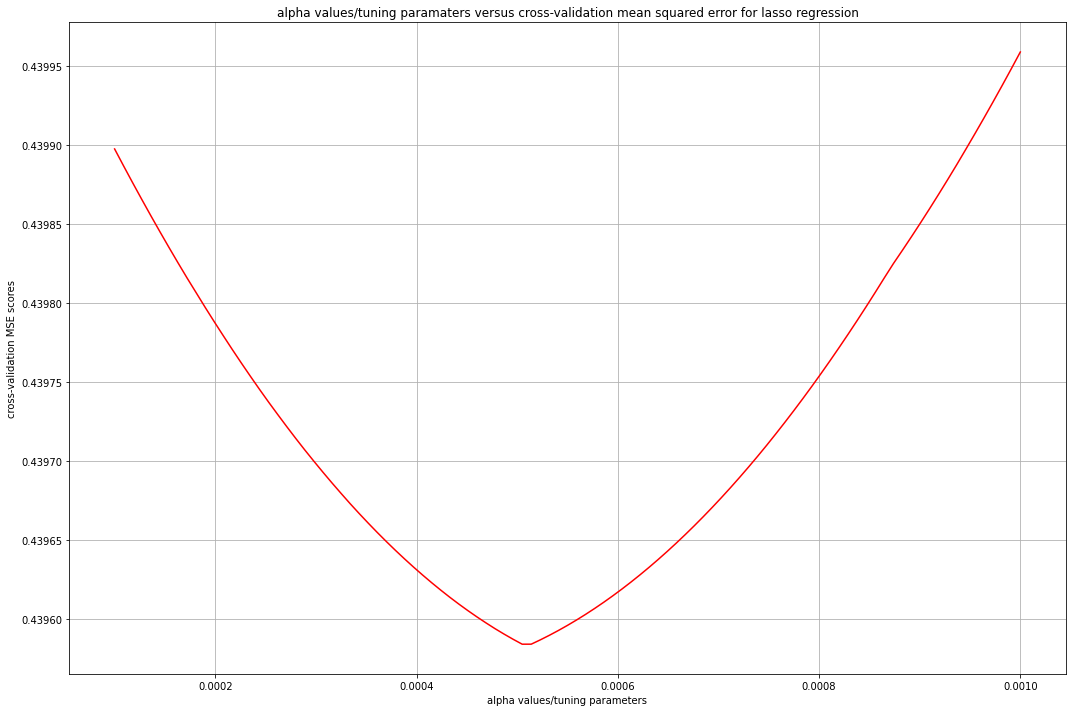

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(lr_alpha_vals, lr_mean_squared_error, color='red')
plt.title("alpha values/tuning paramaters versus cross-validation mean squared error for lasso regression")
plt.xlabel('alpha values/tuning parameters')
plt.ylabel('cross-validation MSE scores')
plt.grid(True, which='both')
plt.tight_layout();

## **4) Elastic Net**

In [ ]:
#Elastic Net
#1) Before Cross Validation
#List of alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
#Calculating RMSE
RMSE = []
for values in alphas:
    elastic = ElasticNet(alpha=values).fit(X_np, Y_np)   
    pred_y = elastic.predict(X_np)
    mse = mean_squared_error(Y_np, pred_y)   
    RMSE.append(np.sqrt(mse))
#Using ElasticNetCV 
#(which is elastic net but CV included that finds the optimal alpha value by itself)
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model_elastic = elastic_cv.fit(x_train, y_train)
#Optimal alpha value
print("Optimal Alpha Value: " + str(model_elastic.alpha_))
#Constant Term (Intercept)
print("Intercept: " + str(model_elastic.intercept_))
#Creating coefficient df
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(model_elastic.coef_)
e_net_coeff

Optimal Alpha Value: 0.001
Intercept: 3.6649596693421134


,Columns,Coefficient Estimate
0,fixed acidity,0.017656
1,volatile acidity,-1.167237
2,citric acid,-0.158529
3,residual sugar,0.012406
4,chlorides,-1.231791
5,free sulfur dioxide,0.002952
6,total sulfur dioxide,-0.002767
7,density,-0.000000
8,pH,-0.304040
9,sulphates,0.780265


In [ ]:
#Plots of tuning parameters versus RMSE
elastic_fig = go.Figure()
elastic_fig.add_trace(go.Scatter(x = alphas, y = RMSE, mode="lines+markers", name="RMSE"))
elastic_fig.update_layout(xaxis_title=r"$\alpha$", yaxis_title="RMSE")